In [60]:
import numpy as np

# Create a 20x20 grid with a discretized circle
def create_circle(grid_size, radius, offset_x=0, offset_y=0):
    x, y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
    center_x = grid_size // 2 + offset_x
    center_y = grid_size // 2 + offset_y
    circle = ((x - center_x)**2 + (y - center_y)**2) <= radius**2
    return circle.astype(float)

# Create a 20x20 grid with a discretized square
def create_square(grid_size, side_length, offset_x=0, offset_y=0):
    square = np.zeros((grid_size, grid_size))
    start_x = (grid_size - side_length) // 2 + offset_x
    start_y = (grid_size - side_length) // 2 + offset_y
    end_x = start_x + side_length
    end_y = start_y + side_length
    square[start_y:end_y, start_x:end_x] = 1
    return square

# Parameters
grid_size = 20
circle_radius = 4
square_side_length = 6
separation_distance = 0  # Distance between circle and square

# Create designs with separation
circle_design = create_circle(grid_size, circle_radius)
square_design = create_square(grid_size, square_side_length)

# Combine circle and square into one grid
initial_design = circle_design
initial_design1 = circle_design

In [61]:
from scipy.ndimage import gaussian_filter
# Apply a filter to the design
def filter_design(design, filter_radius):
    return gaussian_filter(design, sigma=filter_radius)

# Apply thresholding using sigmoid projection
def threshold_design(filtered_design, beta, eta):
    return 1 / (1 + np.exp(-beta * (filtered_design - eta)))

# Parameters for filtering and thresholding
filter_radius = 3
beta = 10
eta = 0.5

# Filter the combined design
filtered_design = filter_design(initial_design, filter_radius)

# Threshold the filtered design
thresholded_design = threshold_design(filtered_design, beta, eta)

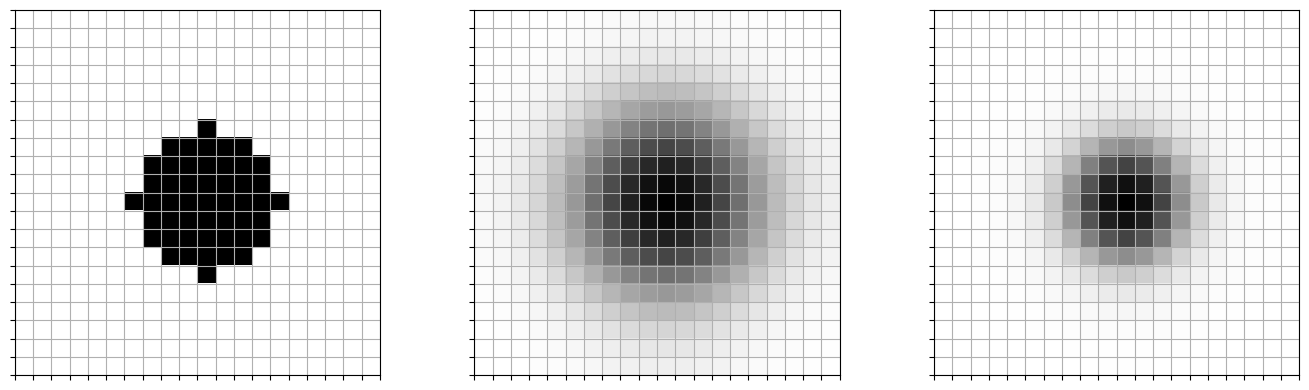

In [62]:
import matplotlib.pyplot as plt

# Plot the designs
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot initial design
axes[0].imshow(1-initial_design, cmap='gray', extent=[0, grid_size, 0, grid_size])
axes[0].grid(True)
axes[0].set_xticks(np.arange(0, grid_size + 1, 1))
axes[0].set_yticks(np.arange(0, grid_size + 1, 1))
axes[0].set_xticklabels([])  # Remove x-axis numbers
axes[0].set_yticklabels([])  # Remove y-axis numbers

# Plot filtered design
axes[1].imshow(1-filtered_design, cmap='gray', extent=[0, grid_size, 0, grid_size])
axes[1].grid(True)
axes[1].set_xticks(np.arange(0, grid_size + 1, 1))
axes[1].set_yticks(np.arange(0, grid_size + 1, 1))
axes[1].set_xticklabels([])  # Remove x-axis numbers
axes[1].set_yticklabels([])  # Remove y-axis numbers

# Plot filtered and thresholded design
axes[2].imshow(1-thresholded_design, cmap='gray', extent=[0, grid_size, 0, grid_size])
axes[2].grid(True)
axes[2].set_xticks(np.arange(0, grid_size + 1, 1))
axes[2].set_yticks(np.arange(0, grid_size + 1, 1))
axes[2].set_xticklabels([])  # Remove x-axis numbers
axes[2].set_yticklabels([])  # Remove y-axis numbers

# Adjust layout
plt.tight_layout()
plt.show()

In [63]:
from scipy.ndimage import gaussian_filter
# Apply a filter to the design
def filter_design(design, filter_radius):
    return gaussian_filter(design, sigma=filter_radius)

# Apply thresholding using sigmoid projection
def threshold_design(filtered_design, beta, eta):
    return 1 / (1 + np.exp(-beta * (filtered_design - eta)))

# Parameters for filtering and thresholding
filter_radius = 1.25
beta = 100
eta = 0.5

# Filter the combined design
filtered_design1 = filter_design(initial_design1, filter_radius)

# Threshold the filtered design
thresholded_design1 = threshold_design(filtered_design1, beta, eta)

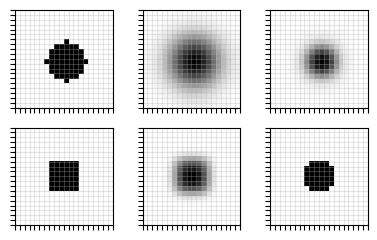

In [64]:
import matplotlib.pyplot as plt

# Plot the designs
fig, axes = plt.subplots(2, 3, figsize=(4, 2.5))

# Plot initial circle design
axes[0, 0].imshow(1 - initial_design, cmap='gray', extent=[0, grid_size, 0, grid_size])
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(np.arange(0, grid_size + 1, 1))
axes[0, 0].set_yticks(np.arange(0, grid_size + 1, 1))
axes[0, 0].set_xticklabels([])  # Remove x-axis numbers
axes[0, 0].set_yticklabels([])  # Remove y-axis numbers

# Plot filtered circle design
axes[0, 1].imshow(1 - filtered_design, cmap='gray', extent=[0, grid_size, 0, grid_size])
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(np.arange(0, grid_size + 1, 1))
axes[0, 1].set_yticks(np.arange(0, grid_size + 1, 1))
axes[0, 1].set_xticklabels([])  # Remove x-axis numbers
axes[0, 1].set_yticklabels([])  # Remove y-axis numbers

# Plot filtered and thresholded circle design
axes[0, 2].imshow(1 - thresholded_design, cmap='gray', extent=[0, grid_size, 0, grid_size])
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].set_xticks(np.arange(0, grid_size + 1, 1))
axes[0, 2].set_yticks(np.arange(0, grid_size + 1, 1))
axes[0, 2].set_xticklabels([])  # Remove x-axis numbers
axes[0, 2].set_yticklabels([])  # Remove y-axis numbers

# Plot initial square design
axes[1, 0].imshow(1 - square_design, cmap='gray', extent=[0, grid_size, 0, grid_size])
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(np.arange(0, grid_size + 1, 1))
axes[1, 0].set_yticks(np.arange(0, grid_size + 1, 1))
axes[1, 0].set_xticklabels([])  # Remove x-axis numbers
axes[1, 0].set_yticklabels([])  # Remove y-axis numbers

# Plot filtered square design
filtered_square_design = filter_design(square_design, filter_radius)
axes[1, 1].imshow(1 - filtered_square_design, cmap='gray', extent=[0, grid_size, 0, grid_size])
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(np.arange(0, grid_size + 1, 1))
axes[1, 1].set_yticks(np.arange(0, grid_size + 1, 1))
axes[1, 1].set_xticklabels([])  # Remove x-axis numbers
axes[1, 1].set_yticklabels([])  # Remove y-axis numbers

# Plot filtered and thresholded square design
thresholded_square_design = threshold_design(filtered_square_design, beta, eta)
axes[1, 2].imshow(1 - thresholded_square_design, cmap='gray', extent=[0, grid_size, 0, grid_size])
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].set_xticks(np.arange(0, grid_size + 1, 1))
axes[1, 2].set_yticks(np.arange(0, grid_size + 1, 1))
axes[1, 2].set_xticklabels([])  # Remove x-axis numbers
axes[1, 2].set_yticklabels([])  # Remove y-axis numbers

# Adjust layout
plt.tight_layout()
plt.show()

In [65]:
fig.savefig('designs.png', dpi=600, bbox_inches='tight')